In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Per cell [73]
import  hvplot.pandas

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
market_data_df_col_names = market_data_df.columns
market_data_df_col_names

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [5]:
### Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# M11D03A04

# scaler = StandardScaler()
# scaler.fit(market_data_df)
# scaled_data = scaler.transform(market_data_df)

market_data_scaled = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

In [6]:
# 	price_change_percentage_24h	price_change_percentage_7d	price_change_percentage_14d	    price_change_percentage_30d	price_change_percentage_60d	price_change_percentage_200d	price_change_percentage_1y
# coin_id							
# bitcoin	    0.508529	    0.493193	                0.772200	                    0.235460	                -0.067495	                -0.355953	                    -0.251637
# ethereum	    0.185446	    0.934445	                0.558692	                    -0.054341	                -0.273483	                -0.115759	                    -0.199352
# tether	    0.021774	    -0.706337	                -0.021680	                    -0.061030	                0.008005	                -0.550247	                    -0.282061
# ripple	    -0.040764	    -0.810928	                0.249458	                    -0.050388	                -0.373164	                -0.458259	                    -0.295546
# bitcoin-cash	1.193036	    2.000959	                1.760610	                    0.545842	                -0.291203	                -0.499848	                    -0.270317
#----------------------------------------------------------

### Create a DataFrame with the scaled data
### Copy the crypto names from the original data
### Set the coinid column as index

df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=[market_data_df_col_names],
    index=[market_data_df.index]
)



### Display sample data
df_market_data_scaled.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# 	k	inertia
# 0	1	287.000000
# 1	2	212.123342
# 2	3	145.897940
# 3	4	131.457370
# 4	5	66.317106
# 5	6	57.402668
# 6	7	49.212644
# 7	8	44.799804
# 8	9	33.859468
# 9	10	29.250314
#----------------------------------------------------------

### Create a list with the number of k-values to try
### Use a range from 1 to 11

k_values = list(range(1,11))

### Create an empty list to store the inertia values

inertia_01 = []
print(inertia_01)

### Create a for loop to compute the inertia with each possible value of k
### Inside the loop:
### 1. Create a KMeans model using the loop counter for the n_clusters
### 2. Fit the model to the data using the scaled DataFrame
### 3. Append the model.inertia_ to the inertia list

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1, n_init='auto')
    model.fit(df_market_data_scaled)
    inertia_01.append(model.inertia_)


### Create a dictionary with the data to plot the Elbow curve
k_dict = {
    "k": k_values, 
    "Inertia": inertia_01
    }
# Code the elbow method algorithm to find the best value for k. Use a range from 1 to 11. --------------------------------------------------------------------------------------> (5 points)
### Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(k_dict)

### Display the DataFrame
elbow_curve_df

[]


c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

,k,Inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: xlabel='k'>

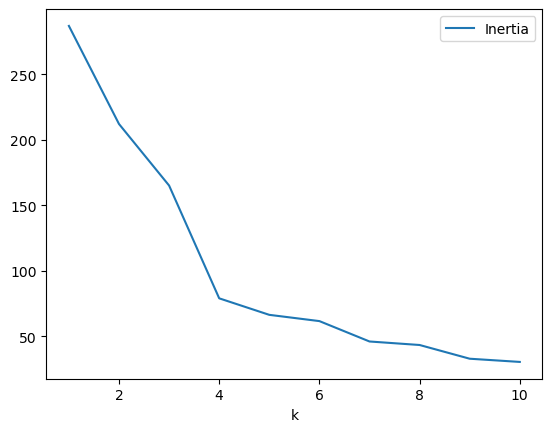

In [10]:
### Plot a line chart with all the inertia values computed with 
### the different values of k to visually identify the optimal value for k.
elbow_curve_df.plot(x="k", y="Inertia")
# Visually identify the optimal value for k by plotting a line chart of all the inertia values computed with the different values of k. --------------------------------------> (5 points)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**4 (5 points)**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
### Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1, n_init='auto')
# Initialize the K-means model with four clusters by using the best value for k. ------------------------------------------------------------------------------------> (1 point)

In [12]:
### Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)
# Fit the K-means model by using the original data. ------------------------------------------------------------------------------------------------------------------> (1 point)

c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [13]:
### Predict the clusters to group the cryptocurrencies using the scaled data
predict = model.predict(df_market_data_scaled)

### View the resulting array of cluster values.
predict
# Predict the clusters for grouping the cryptocurrencies by using the original data. Review the resulting array of cluster values. --------------------------------> (3 points)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [14]:
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [15]:
### Create a copy of the DataFrame
market_data_02_df = df_market_data_scaled.copy()


### Add a new column to the DataFrame with the predicted clusters
market_data_02_df["crypto_cluster"] = predict

# Create a copy of the original data, and then add a new column of the predicted clusters. ----------------------------------------------------------------------> (1 point)

### Display sample data
market_data_02_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [24]:
market_data_02_df["crypto_cluster"].value_counts()

(crypto_cluster,)
0                    26
2                    13
1                     1
3                     1
Name: count, dtype: int64

c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

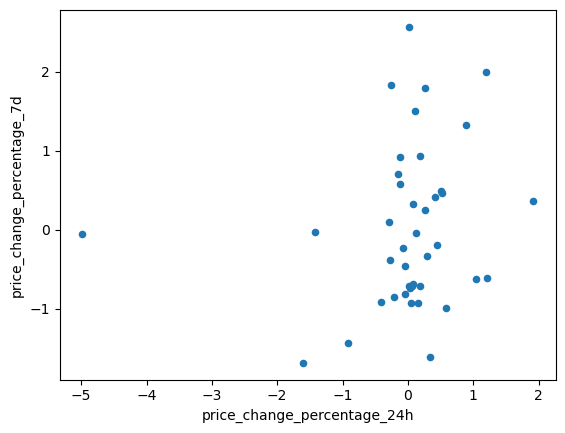

In [33]:
### Create a scatter plot using Pandas plot by setting 
### `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
### Use "rainbow" for the color to better visualize the data.

# market_data_02_df.plot.scatter(
#     x="price_change_percentage_24h",
#     y="price_change_percentage_7d")

market_data_02_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    cmap='rainbow')

# market_data_02_df.plot.scatter(
#     x="price_change_percentage_24h",
#     y="price_change_percentage_7d",
#     c='crypto_cluster',
#     cmap='rainbow')


#######################################################################################################################################################
#######################################################################################################################################################
#######################################################################################################################################################
#######################################################################################################################################################

# Using pandas’ plot, create a scatter plot by setting x="price_change_percentage_24h" and y="price_change_percentage_7d". --------------------------------------------> (4 points)

### Optimize Clusters with Principal Component Analysis.

In [35]:
### Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
# Create a PCA model instance, and set n_components=3. ----------------------------------------------------------------------------------------------------------> (1 point)

In [37]:
# array([[-0.60066733,  0.84276006,  0.46159457],
#        [-0.45826071,  0.45846566,  0.95287678],
#        [-0.43306981, -0.16812638, -0.64175193],
#        [-0.47183495, -0.22266008, -0.47905316],
#        [-1.15779997,  2.04120919,  1.85971527]])
#----------------------------------------------------------

### Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca_data = pca.fit_transform(df_market_data_scaled)

### View the first five rows of the DataFrame. 
market_pca_data[:5]
# Use the PCA model to reduce the features to three principal components, then review the first five rows of the DataFrame. -------------------------------------> (2 points)

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [38]:
# array([0.3719856 , 0.34700813, 0.17603793])
#----------------------------------------------------------

### Retrieve the explained variance to determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_
# Get the explained variance to determine how much information can be attributed to each principal component. ----------------------------------------------------> (2 points)

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

Answer:(0.3719856 + 0.34700813 + 0.17603793) = 0.89503166, or **approximately 90%**    (3 points)

In [46]:
# 	                  PCA1	    PCA2	    PCA3
# coin_id			
# bitcoin	        -0.600667	0.842760	0.461595
# ethereum	        -0.458261	0.458466	0.952877
# tether	        -0.433070	-0.168126	-0.641752
# ripple	        -0.471835	-0.222660	-0.479053
# bitcoin-cash	    -1.157800	2.041209	1.859715
# binancecoin	    -0.516534	1.388377	0.804071
# chainlink	        -0.450711	0.517699	2.846143
# cardano	        -0.345600	0.729439	1.478013
# litecoin	        -0.649468	0.432165	0.600303
# bitcoin-cash-sv	-0.759014	-0.201200	-0.217653
#----------------------------------------------------------

### Create a new DataFrame with the PCA data.
### Note: The code for this step is provided for you

### Creating a DataFrame with the PCA data
### Note: The code for this step is provided for you

### Creating a DataFrame with the PCA data
### ------ Patch provided by Sean, 7/15/24 -----
market_data_pca_df = pd.DataFrame(
    market_pca_data, 
    columns=["PCA1", "PCA2", "PCA3"]
)

### Copy the crypto names from the original data
market_data_pca_df['names'] = market_data_df.index

### Set the coinid column as index
market_pca_data_02 = market_data_pca_df.set_index('names')

### Display sample data
market_pca_data_02.head()
# Create a new DataFrame with the PCA data. 
# Be sure to set the coin_id index from the original DataFrame as the index for the new DataFrame. 
# Review the resulting DataFrame. ------------------------------------------------------------------------------------------------------------------------------> (2 points)


,PCA1,PCA2,PCA3
names,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [47]:
# 	k	inertia
# 0	1	256.874086
# 1	2	168.811896
# 2	3	115.918077
# 3	4	49.665497
# 4	5	39.094217
# 5	6	27.961695
# 6	7	24.462735
# 7	8	19.451747
# 8	9	13.755814
# 9	10	13.119661
#----------------------------------------------------------

### Create a list with the number of k-values to try
### Use a range from 1 to 11
k_values_02 = list(range(1,11))

### Create an empty list to store the inertia values
inertia_02 = []


### Create a for loop to compute the inertia with each possible value of k
### Inside the loop:
### 1. Create a KMeans model using the loop counter for the n_clusters
### 2. Fit the model to the data using PCA DataFrame.
### 3. Append the model.inertia_ to the inertia list

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1, n_init='auto')
    model.fit(market_pca_data_02)
    inertia_02.append(model.inertia_)

### Create a dictionary with the data to plot the Elbow curve
k_dict_02 = {
    "k": k_values, 
    "Inertia": inertia_02
    }

### Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df_02 = pd.DataFrame(k_dict_02)

# Code the elbow method algorithm, and use the PCA data to find the best value for k. Use a range from 1 to 11. -----------------------------------------------------------------------> (2 points)

### Display the DataFrame
elbow_curve_df_02

c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

,k,Inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: xlabel='k'>

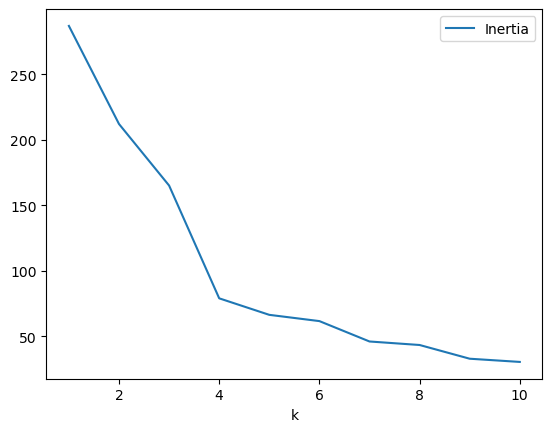

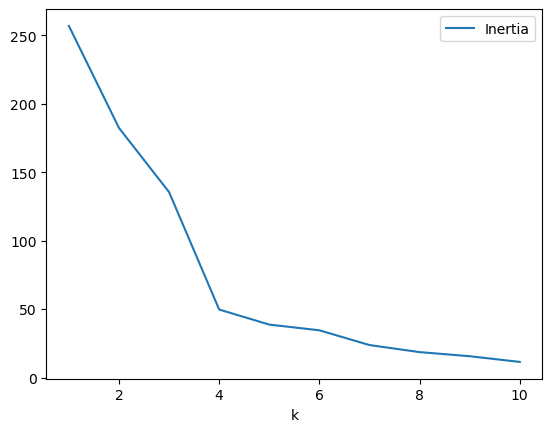

In [50]:
### Plot a line chart with all the inertia values computed with 
### the different values of k to visually identify the optimal value for k.
elbow_curve_df.plot(x="k", y="Inertia")
elbow_curve_df_02.plot(x="k", y="Inertia")
# Visually identify the optimal value for k by plotting a line chart of all the inertia values computed with the different values of k. ---------------------------------------------------> (5 points)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 4** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: Not significantly (3 Points)** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [51]:
### Initialize the K-Means model using the best value for k
model_02 = KMeans(n_clusters=4, random_state=1, n_init='auto')
# Initialize the K-means model with four clusters by using the best value for k. -------------------------------------------------------------------------------------------> (1 point)

In [52]:
### Fit the K-Means model using the PCA data
model_02.fit(market_pca_data_02)
# Fit the K-means model by using the PCA data. ---------------------------------------------------------------------------------------------------------------------------> (1 point)

c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [53]:
### Predict the clusters to group the cryptocurrencies using the PCA data

predict_02 = model_02.predict(market_pca_data_02)
### Print the resulting array of cluster values.
predict_02

# Predict the clusters for grouping the cryptocurrencies by using the PCA data. Review the resulting array of cluster values. ---------------------------------------------> (3 points)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [55]:
# 	            PCA1	    PCA2	    PCA3	    crypto_cluster
# coin_id				
# bitcoin	    -0.600667	0.842760	0.461595	1
# ethereum	    -0.458261	0.458466	0.952877	1
# tether	    -0.433070	-0.168126	-0.641752	0
# ripple	    -0.471835	-0.222660	-0.479053	0
# bitcoin-cash	-1.157800	2.041209	1.859715	1
#----------------------------------------------------------

### Create a copy of the DataFrame with the PCA data
market_pca_data_03= market_pca_data_02.copy()

### Add a new column to the DataFrame with the predicted clusters
market_pca_data_03["crypto_cluster"] = predict_02

# Create a copy of the DataFrame with the PCA data, and then add a new column to store the predicted clusters. ----------------------------------------------------------------> (1 point)

### Display sample data
market_pca_data_03.head()


,PCA1,PCA2,PCA3,crypto_cluster
names,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [73]:
### Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
#                               ↑↑↑
#import  hvplot.pandas (moving to top)

market_pca_data_03.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    height=400, 
    width=600,
    colorbar=True,
    clabel="crypto_cluster",
    #cmap="Dark2"
    cmap="winter"
)

# hvplot.show()
#                                                                                                                                    Rubric says "plot" and Start file says "hvPlot" 
#                                                                                                                                            (with the propper cap 'P')
#                                                                                                                                    so I am using that (adn I will learn somethign new).
#                                                                                                                                    Please fix descrepency.
# Using pandas’ plot, create a scatter plot by setting x="PC1" and y="PC2". ---------------------------------------------------------------------------------------------------------> (4 points)


:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [75]:
### Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_data_scaled.columns)
# Create a DataFrame that shows the weights of each feature (column)
#  for each principal component by using the columns from the original scaled DataFrame as the index. ----------------------------------------------------------------------------------> (10 points)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer: (5 points)**
- PCA1 (+) : price_change_percentage_200d
- PCA1 (-) : price_change_percentage_24h  
  
        "price_change_percentage_200d" has the greatest effect on PCA1.
---
- PCA2 (+) : price_change_percentage_30d
- PCA2 (-) : price_change_percentage_1y  
  
        "price_change_percentage_30d" has the greatest effect on PCA2.

---
- PCA3 (+) : price_change_percentage_7d
- PCA3 (-) : price_change_percentage_60d  
  
        "price_change_percentage_7d" has the greatest effect on PCA3.
    

### Coding Conventions and Formatting (10 points)								
 - Place imports at the top of the file, just after any module comments and docstrings, and before module globals and constants. (3 points)							
    > Import operation for hvPlot() move to the top, with additional comment giving necessary cell reference for discrepency.
 - Name functions and variables with lowercase characters, with words separated by underscores. (2 points)  
    > Complete.
 - Follow DRY (Don't Repeat Yourself) principles, creating maintainable and reusable code. (3 points)  
   > Naming conventions were created as common values with numerical incraments, to show common function while maintianing independant values.
 - Use concise logic and creative engineering where possible. (2 points)  
    >.copy() functions were chosen to increment a variable so that the coding blocks remained static, and could be run without resetting order.						
### Deployment and Submission (10 points)								
 - Submit a link to a GitHub repository that’s cloned to your local machine and that contains your files. (4 points)	
    > Complete
 - Use the command line to add your files to the repository. (3 points)		
    > Complet
 - Include appropriate commit messages in your files. (3 points)	
    > Complete.  Initial push on (24_0720), with one error in code ("Rainbow"), to be reviewed before class on Monday.
### Code Comments (10 points)								
 - Be well commented with concise, relevant notes that other developers can understand. (10 points)							
    > See above.